### Cliques

A clique of size K in an undirected graph $G=(V,E)$ is a subset graph $W \in V$ of size $|W| = K$ where the given subgraph is a complete graph i.e the number of edges in the sub graph is $\frac{K(K+1)}{2}$ .

Reference: https://arxiv.org/abs/1302.5843

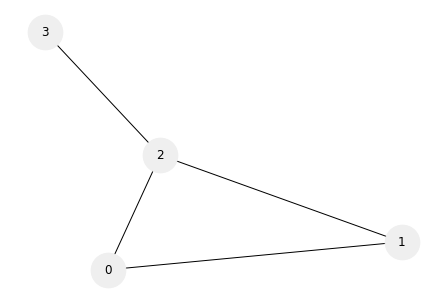

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

options = {'node_color': '#efefef','node_size': 1200,'with_labels':'True'}

n = 4
K = 3

G = nx.Graph()
G.add_nodes_from(nx.path_graph(n))
G.add_edges_from([(0,1), (0,2),(1,2),(2,3)])
nx.draw(G, **options)

The hamiltonian of the above problem is formed in a constraint rich way where if H = 0 for a given hamiltonian, their is a feasible solution of the clique problem with a subgraph of size K. We have two constraints:

1. The subgraph should be of size K.

$$ C_1 = A ( K - \sum_{v} x_v) ^ 2 $$

2. The number of edges in the subgraph should be $\frac{K(K-1)}{2}$ : 

$$ C_2 = B [ \frac{K(K-1)}{2} - \sum_{uv \in E} x_{u}x_{v} ] $$

The weighted sum of these two constraints form our hamiltonian.

In [6]:
from blueqat import vqe
from blueqat.pauli import qubo_bit as q
from blueqat.utils import qaoa
import numpy as np

H = 0.0

C_1 = 0.0

C_1 = (K - sum([q(i) for i in range(n)]))**2

C_2 = 0.0

C_2 = K*(K-1)/2 - sum([q(k[0])*q(k[1]) for k in G.edges])

H = C_1*100+ C_2*20   

In [5]:
step = 1

result = qaoa(H, step)
b = result.circuit.run(shots=10)
sample = b.most_common(1)[0][0]

In [4]:
sample

'1110'